In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests 

In [2]:
from config import weather_api_key

In [3]:
# Basic URL for openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=756f9522a4b005a9bb257a1418a87a16


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | malanje
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | natchez
Processing Record 6 of Set 1 | tres lagoas
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | avera
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | lahat
Processing Record 24 of Set 1 |

City not found. Skipping...
Processing Record 38 of Set 4 | porto novo
Processing Record 39 of Set 4 | tolaga bay
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | nizwa
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | boa vista
Processing Record 47 of Set 4 | maragogi
Processing Record 48 of Set 4 | landeck
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | cabuyaro
Processing Record 1 of Set 5 | poum
Processing Record 2 of Set 5 | srednekolymsk
Processing Record 3 of Set 5 | dharchula
Processing Record 4 of Set 5 | annau
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | kizlyar
Processing Record 7 of Set 5 | eureka
Processing Record 8 of Set 5 | east stroudsburg
Processing Record 9 of Set 5 | progreso
Processing Record 10 of Set 5 | blue springs
Processing Record 11

Processing Record 27 of Set 8 | vanimo
Processing Record 28 of Set 8 | beira
Processing Record 29 of Set 8 | adrar
Processing Record 30 of Set 8 | cascais
Processing Record 31 of Set 8 | nuristan
Processing Record 32 of Set 8 | luklukan
Processing Record 33 of Set 8 | tamsweg
Processing Record 34 of Set 8 | utiroa
City not found. Skipping...
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | san angelo
Processing Record 37 of Set 8 | leningradskiy
Processing Record 38 of Set 8 | vostok
Processing Record 39 of Set 8 | bowen
Processing Record 40 of Set 8 | abha
Processing Record 41 of Set 8 | jacksonville
Processing Record 42 of Set 8 | urumqi
Processing Record 43 of Set 8 | kingman
Processing Record 44 of Set 8 | liminangcong
City not found. Skipping...
Processing Record 45 of Set 8 | brigantine
Processing Record 46 of Set 8 | aksarka
Processing Record 47 of Set 8 | jijiga
Processing Record 48 of Set 8 | faanui
Processing Record 49 of Set 8 | abu dhabi
Process

Processing Record 12 of Set 12 | sisimiut
Processing Record 13 of Set 12 | tome-acu
City not found. Skipping...
Processing Record 14 of Set 12 | salisbury
Processing Record 15 of Set 12 | psebay
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | ensenada
Processing Record 18 of Set 12 | maltahohe
Processing Record 19 of Set 12 | opuwo
Processing Record 20 of Set 12 | urucui
Processing Record 21 of Set 12 | kristiansund
Processing Record 22 of Set 12 | qurbus
Processing Record 23 of Set 12 | fort nelson
Processing Record 24 of Set 12 | bada
Processing Record 25 of Set 12 | bagotville
Processing Record 26 of Set 12 | pevek
Processing Record 27 of Set 12 | kodinsk
Processing Record 28 of Set 12 | krasnoselkup
Processing Record 29 of Set 12 | gao
Processing Record 30 of Set 12 | beloha
Processing Record 31 of Set 12 | ardakan
Processing Record 32 of Set 12 | yinchuan
Processing Record 33 of Set 12 | toora-khem
Processing Record 34 of Set 12 | chelmsford
Processing R

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,75.58,83,100,5.23,BR,2021-02-06 23:31:28
1,Malanje,-9.5402,16.3410,64.38,97,100,2.51,AO,2021-02-06 23:31:28
2,Puerto Ayora,-0.7393,-90.3518,86.00,62,0,16.11,EC,2021-02-06 23:31:28
3,Ushuaia,-54.8000,-68.3000,51.80,76,40,21.85,AR,2021-02-06 23:31:28
4,Natchez,31.5604,-91.4032,51.80,87,90,5.75,US,2021-02-06 23:28:02
5,Tres Lagoas,-20.7511,-51.6783,70.09,76,0,4.61,BR,2021-02-06 23:31:29
6,Port Macquarie,-31.4333,152.9167,81.00,73,52,1.99,AU,2021-02-06 23:31:09
7,Hermanus,-34.4187,19.2345,68.00,89,80,2.91,ZA,2021-02-06 23:31:29
8,Saldanha,-33.0117,17.9442,64.40,82,13,3.44,ZA,2021-02-06 23:31:30
9,Hobart,-42.8794,147.3294,64.99,59,75,13.80,AU,2021-02-06 23:31:31


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-02-06 23:31:28,-22.9661,-42.0278,75.58,83,100,5.23
1,Malanje,AO,2021-02-06 23:31:28,-9.5402,16.3410,64.38,97,100,2.51
2,Puerto Ayora,EC,2021-02-06 23:31:28,-0.7393,-90.3518,86.00,62,0,16.11
3,Ushuaia,AR,2021-02-06 23:31:28,-54.8000,-68.3000,51.80,76,40,21.85
4,Natchez,US,2021-02-06 23:28:02,31.5604,-91.4032,51.80,87,90,5.75
5,Tres Lagoas,BR,2021-02-06 23:31:29,-20.7511,-51.6783,70.09,76,0,4.61
6,Port Macquarie,AU,2021-02-06 23:31:09,-31.4333,152.9167,81.00,73,52,1.99
7,Hermanus,ZA,2021-02-06 23:31:29,-34.4187,19.2345,68.00,89,80,2.91
8,Saldanha,ZA,2021-02-06 23:31:30,-33.0117,17.9442,64.40,82,13,3.44
9,Hobart,AU,2021-02-06 23:31:31,-42.8794,147.3294,64.99,59,75,13.80


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

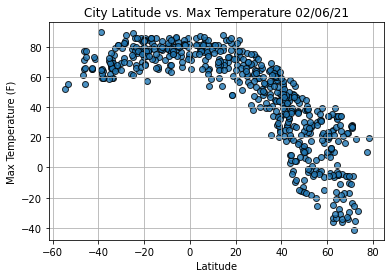

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

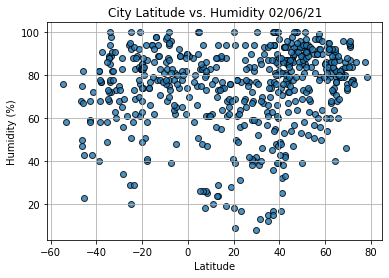

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

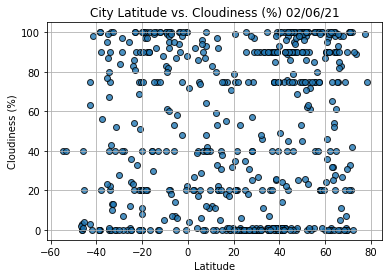

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

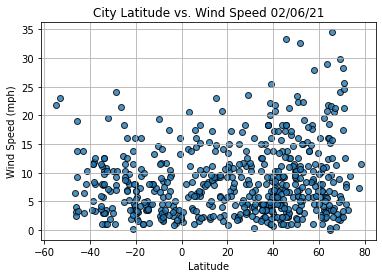

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  Port Alfred
Country                        ZA
Date          2021-02-06 23:31:25
Lat                      -33.5906
Lng                        26.891
Max Temp                       68
Humidity                       89
Cloudiness                     43
Wind Speed                      3
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

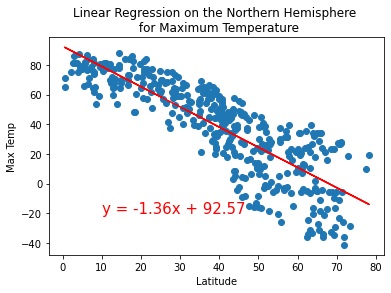

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(10,-20))

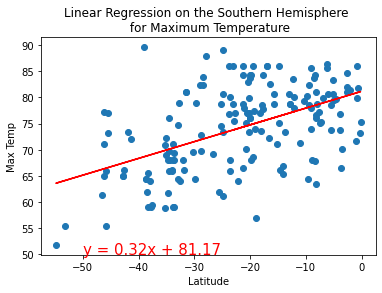

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,50))


In [24]:
linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.3620059234823712, intercept=92.57444061194434, rvalue=-0.8330082123038186, pvalue=1.3787713467792524e-103, stderr=0.04551566873318746)

In [25]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.3204615677476224, intercept=81.1692360306409, rvalue=0.5124704684953791, pvalue=7.770419861005719e-13, stderr=0.041305479915954124)

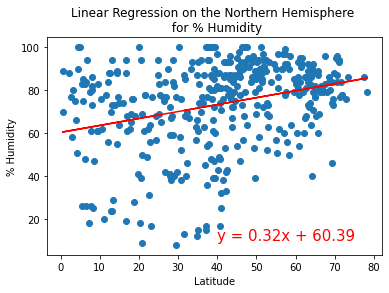

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

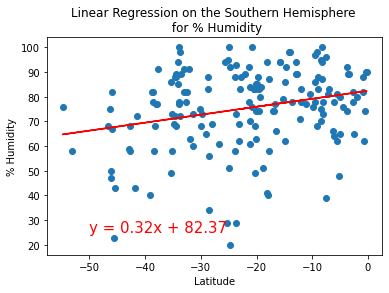

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))


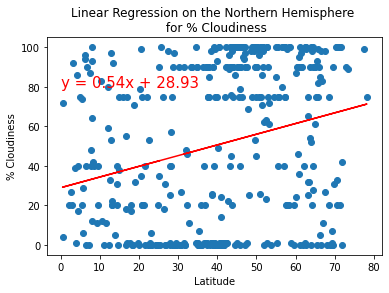

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,80))


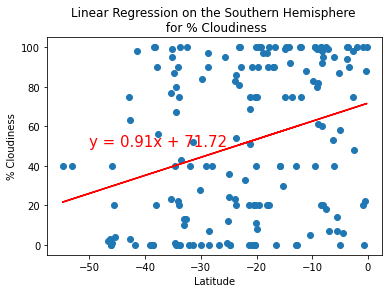

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,50)
                      )

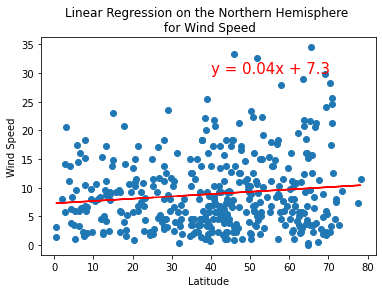

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))


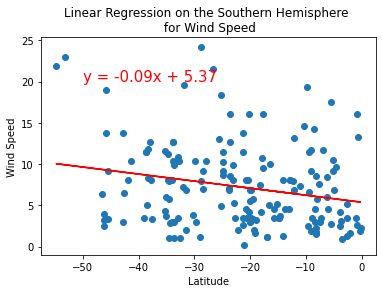

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))
